<a href="https://colab.research.google.com/github/alessaag/Exploraci-n-y-Visualizaci-n-de-Datos/blob/main/ValoresPerdidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de distribuciones, tratamiento de valores perdidos y escalado de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carga de datos: obtenidos de: https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input?select=globalterrorismdb_0718dist.csv
gtd = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1', low_memory=False)

#Visualizar primeras filas del dataset
gtd.info()
gtd.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Imprimir las columnas desde un rango específico

In [4]:
#Seleccionar e imprimir columnas desde la 10 hasta las 20
selected_columns = gtd.iloc[:,10:21]
selected_columns


,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2
0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1
1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1
2,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1
3,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1
4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...
181686,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1
181687,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1
181688,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1
181689,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1


# Seleccionar columnas específicas

In [5]:
#Seleccionar y mostrar solo las columnas deseadas
selected_especific_columns = gtd[['iyear', 'country_txt', 'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound']]
selected_especific_columns #para ver un rango específico se agrega .iloc[10:20]

,iyear,country_txt,attacktype1_txt,weaptype1_txt,nkill,nwound
0,1970,Dominican Republic,Assassination,Unknown,1.0,0.0
1,1970,Mexico,Hostage Taking (Kidnapping),Unknown,0.0,0.0
2,1970,Philippines,Assassination,Unknown,1.0,0.0
3,1970,Greece,Bombing/Explosion,Explosives,NaN,NaN
4,1970,Japan,Facility/Infrastructure Attack,Incendiary,NaN,NaN
...,...,...,...,...,...,...
181686,2017,Somalia,Armed Assault,Firearms,1.0,2.0
181687,2017,Syria,Bombing/Explosion,Explosives,2.0,7.0
181688,2017,Philippines,Facility/Infrastructure Attack,Incendiary,0.0,0.0
181689,2017,India,Bombing/Explosion,Explosives,0.0,0.0


# Gráfico de barras de incidentes por año

<ipython-input-6-cb9c119e34a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(gtd, x='iyear', palette='viridis')


Text(0, 0.5, 'Número de Incidentes')

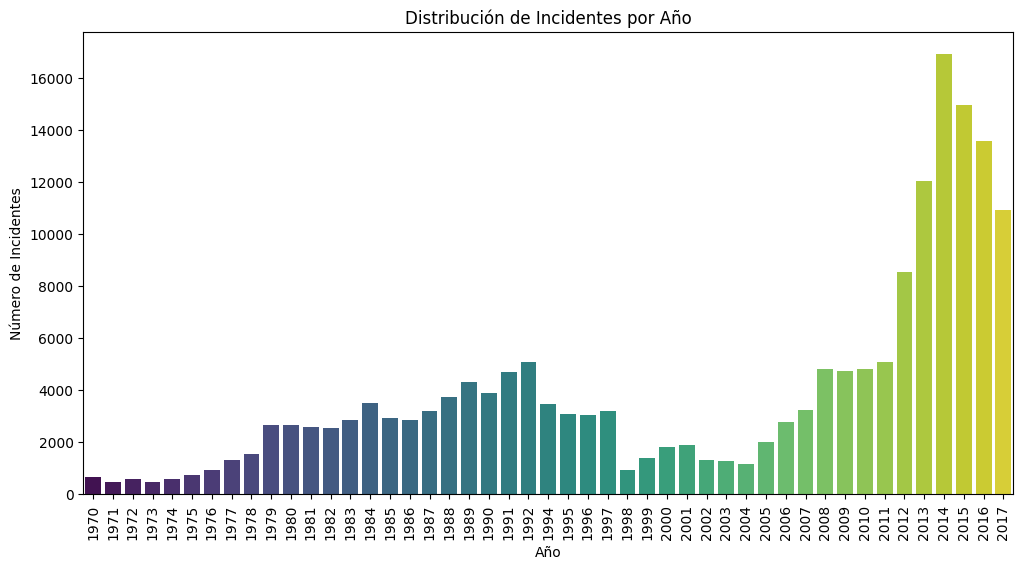

In [6]:
#Distribución de incidentes por año

plt.figure(figsize=(12, 6))
sns.countplot(gtd, x='iyear', palette='viridis')
plt.title('Distribución de Incidentes por Año')
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')

# Histograma que muestra la distribución de número de víctimas

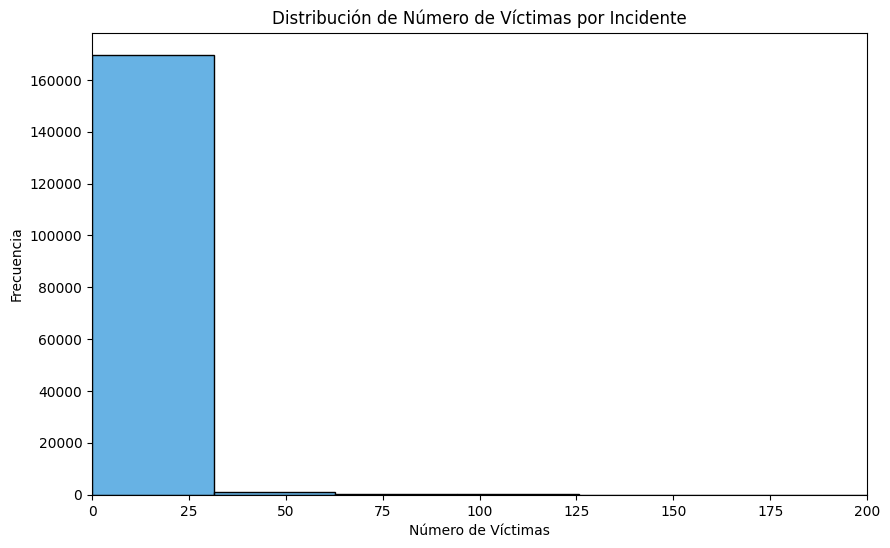

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(gtd['nkill'].dropna(), bins=50, color='#3498db')
plt.title('Distribución de Número de Víctimas por Incidente')
plt.xlim(0,200)
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

# Identificación de valores perdidos

In [17]:
#Revisar cuántod valores nulos tiene cada columna
missing_values = gtd.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print(missing_values[missing_values > 0])

gsubname3           181671
weapsubtype4        181621
weapsubtype4_txt    181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
guncertain1            380
ishostkid              178
specificity              6
doubtterr                1
multiple                 1
Length: 106, dtype: int64


# Visualizar los valores faltantes para obtener una visión más clara a partir de un mapa de calor

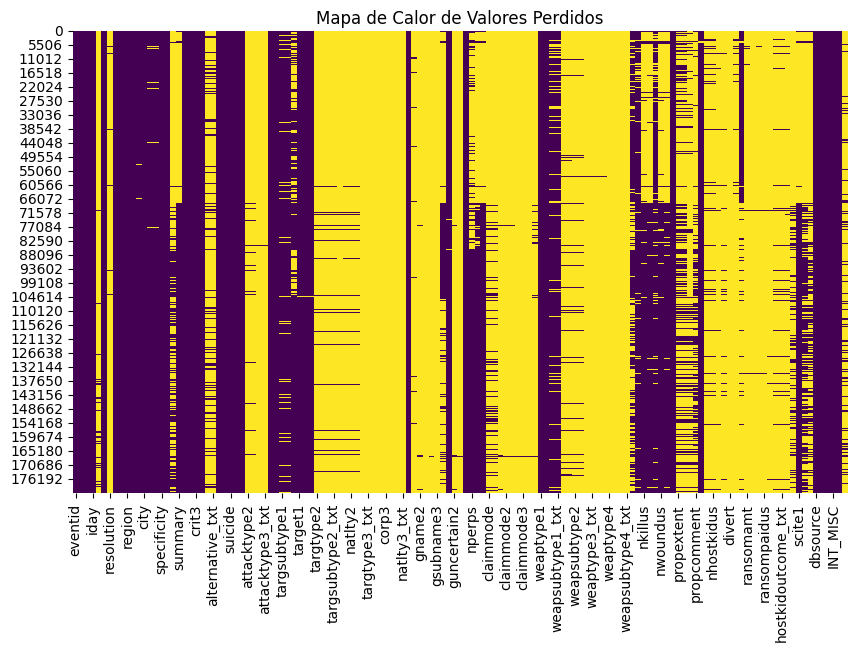

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(gtd.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Perdidos')
plt.show()

## Tratamiento de valores perdidos

Eliminación de filas o columnas con muchos valores perdidos



In [4]:
#Eiminar columnas con más del 50% de valores nulos

treshold = len(gtd) * 0.5 # Cálculo del umbral, el valor indica cuántos valores no nulos necesita tener una columna para no ser eliminada

gtd = gtd.dropna(thresh=treshold, axis=1) #Eliminar columnas con valores nulos por encima del umbral.

gtd.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


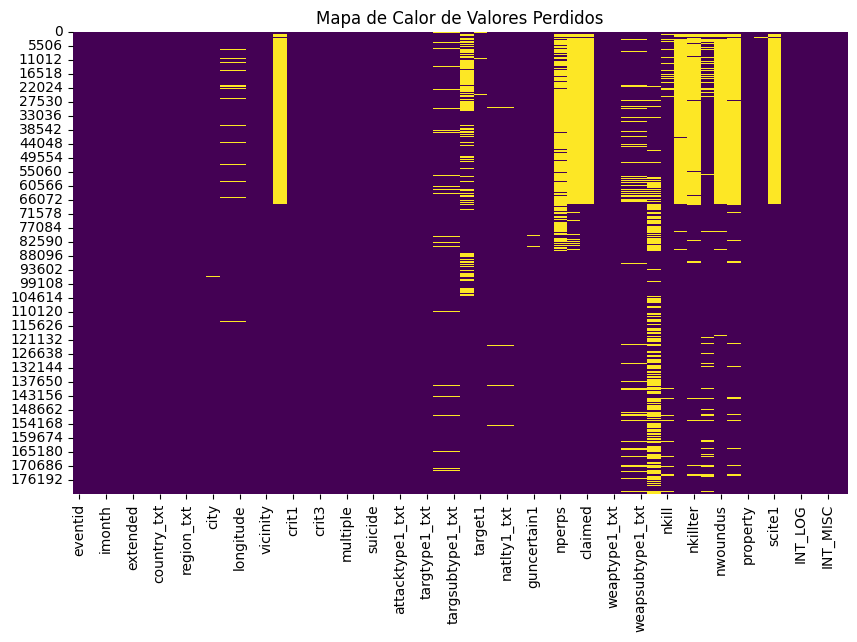

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(gtd.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Perdidos')
plt.show()

Imputación de valores faltantes

In [8]:
#Imputar con la mediana en la columna 'nwound' (número de heridos)

gtd['nwound'] = gtd['nwound'].fillna(gtd['nwound'].median())

print(gtd['nwound'])
gtd['nwound'].isnull().sum()

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
181686    2.0
181687    7.0
181688    0.0
181689    0.0
181690    0.0
Name: nwound, Length: 181691, dtype: float64


0

In [9]:
#Imputar con la moda en 'attacktype1_txt' (tipo de ataque)

gtd['attacktype1_txt'] = gtd['attacktype1_txt'].fillna(gtd['attacktype1_txt'].mode()[0])
gtd['attacktype1_txt'].isnull().sum()

print(gtd['attacktype1_txt'])

0                          Assassination
1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: attacktype1_txt, Length: 181691, dtype: object


In [10]:
#Imputar con un valor constante "Desconocido" a los valores nulos de 'weaptype1_txt'

gtd['weaptype1_txt'] = gtd['weaptype1_txt'].fillna('Desconocido')

print(gtd['weaptype1_txt'])
#gtd['weaptype1_txt'].isnull().sum()

0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: weaptype1_txt, Length: 181691, dtype: object


In [11]:
#Convertir valores nulos en 'claimmode' a 'No especificado'
gtd['claimed'] = gtd['claimed'].fillna('No especificado')

print(gtd['claimed'])

0         No especificado
1         No especificado
2         No especificado
3         No especificado
4         No especificado
               ...       
181686                1.0
181687                0.0
181688                0.0
181689                0.0
181690                0.0
Name: claimed, Length: 181691, dtype: object


In [12]:
#Revisar valores nulos restantes
print(gtd.isnull().sum())

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42552
target1               638
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

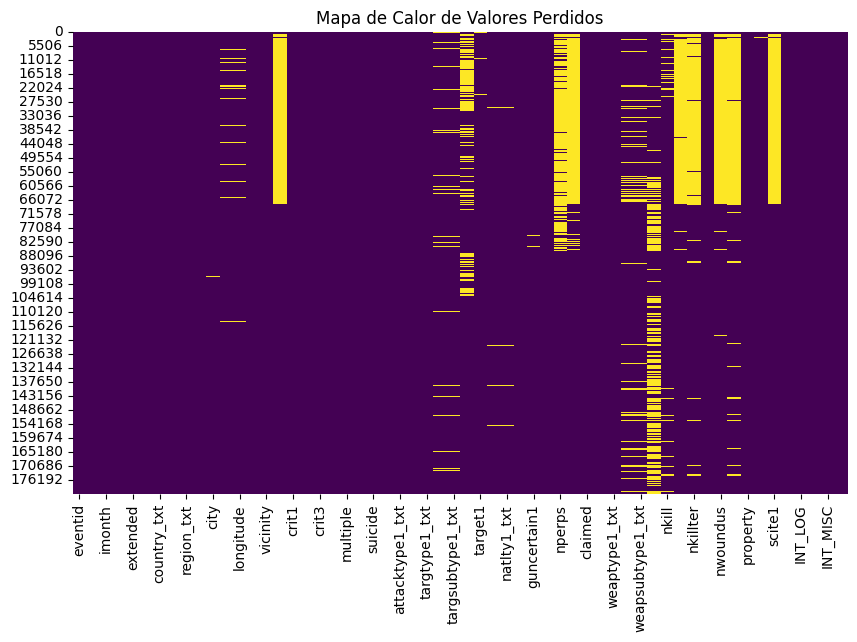

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(gtd.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Perdidos')
plt.show()

# Guardado del dataset

In [14]:
#Guardar el DataFrame modificado como archivo .csv

gtd.to_csv('gtd_modificado.csv', index=False)